In [24]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./double_tilt.csv','r',encoding = 'utf-8-sig')
rdr = csv.reader(file)
prompt = float(0)
var = [-0.002,0.002]  #Put the proper set value in front. This may be Rrod, Hrod, Tilt angle etc. Write all the cases.
var_tup = []
for v in var: 
   for u in var:
      var_tup.append((v,u))
#print(var_tup)
dt = np.zeros((len(var_tup),9), dtype=object) # Angle / Freq / C / Gtot / Grod
data = dict(zip(var_tup,dt))
#print(data)
for line in rdr:
   for v in var:
      for u in var:
         if(float(line[1]) == float(v) and float(line[2]) == float(u) and float(line[5])>0.05): 
            data[(v,u)][0] = np.append(data[(v,u)][0],float(line[0]))
            data[(v,u)][1] = np.append(data[(v,u)][1],float(line[3]))
            data[(v,u)][2] = np.append(data[(v,u)][2],float(line[5]))
            data[(v,u)][3] = np.append(data[(v,u)][3],float(line[-2]))
            data[(v,u)][4] = np.append(data[(v,u)][4],float(line[-1]))
for v in var:
   for u in var:
      for i in range (5):
         data[(v,u)][i] = data[(v,u)][i][1:]


(-0.002, -0.002)
(-0.002, 0.002)
(0.002, -0.002)
(0.002, 0.002)


Text(0.5, 1.0, 'Rod Angle v. Frequency')

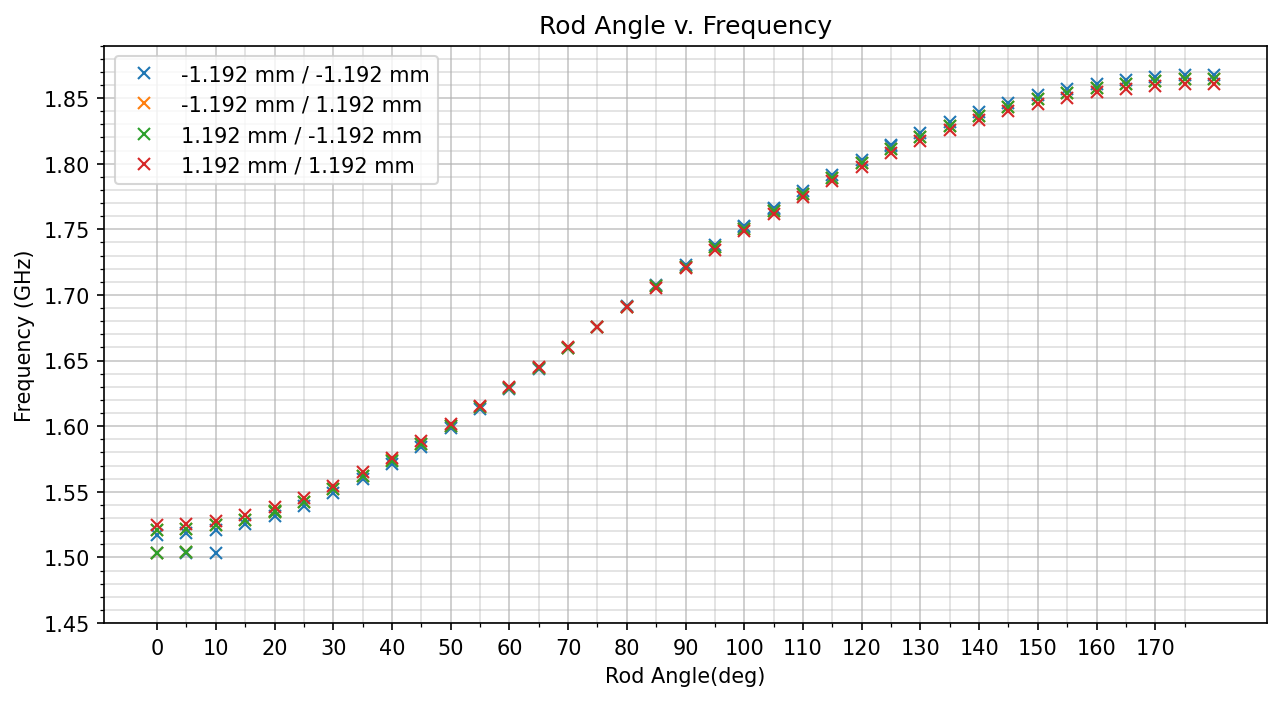

In [26]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
for v in var:
   for u in var:
      angle = data[(v,u)][0]
      freq = data[(v,u)][1]
      if v == 0:
         label = 'prompt'
         axs.plot(angle,freq,marker='x',linestyle = '--', label = label)
      else:
         label = '%.3f mm / %.3f mm' %((v*596),(u*596))
         axs.plot(angle,freq,marker='x',linestyle='None',label=label)
         print((v,u))
axs.legend()
axs.set_xticks(np.arange(0,180,10))
axs.set_xticks(np.arange(0,180,5),minor=True)
axs.set_yticks(np.arange(1.45,1.90,0.05))
axs.set_yticks(np.arange(1.45,1.90,0.01),minor=True)
axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)
axs.set_xlabel("Rod Angle(deg)")
axs.set_ylabel("Frequency (GHz)")
axs.set_title("Rod Angle v. Frequency")

Text(0.5, 1.0, 'Frequency v. C/$Q_{tot}$ (Double Tilt in mm)')

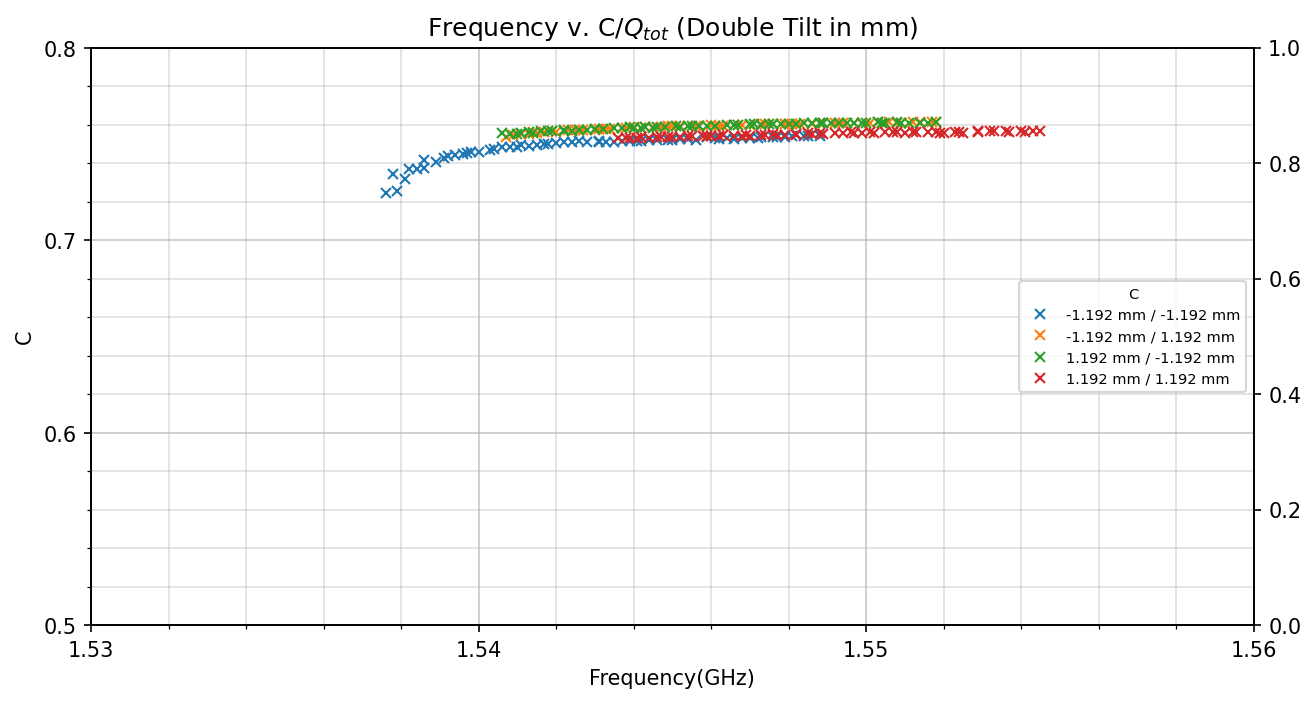

In [22]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
twin1 = axs.twinx()  

for v in var:
   for u in var:
      
      freq = data[(v,u)][1] # freq
      pmt = data[(v,u)][2] # C 
      Qtot = data[(v,u)][3] # Qtot
      label = '%.3f mm / %.3f mm' %((v*596),(u*596))
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label,markersize=5)
      # twin1.plot(freq,Qtot,marker='.',linestyle='None',label = label,markersize=5)

#Frequency
axs.set_xticks(np.arange(1.53,1.56,0.01))
axs.set_xticks(np.arange(1.53,1.56,0.002),minor=True)

#Rotation Angle
#axs.set_xticks(np.arange(100,111,1))
#axs.set_xticks(np.arange(100,110,0.1),minor=True)

axs.set_yticks(np.arange(0.5,0.8,0.1))
axs.set_yticks(np.arange(0.5,0.8,0.02),minor=True)

# twin1.set_yticks(np.arange(1.3e6,2.7e6,0.1e6))
# twin1.set_yticks(np.arange(1.3e6,2.7e6,0.02e6),minor=True)
axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend(title='C',title_fontsize=7,fontsize=7,loc='right')
# twin1.legend(title='$Q_{tot}$',title_fontsize=7,fontsize=7,loc='lower right')
axs.set_ylabel('C')
axs.set_xlabel('Frequency(GHz)')
#axs.set_xlabel('Angle (°)')
# twin1.set_ylabel('$Q_{tot}(\Omega)$')
axs.set_title('Frequency v. C/$Q_{tot}$ (Double Tilt in mm)')
#axs.set_title('Rotation Angle v. C/$Q_{tot}$ (Radial Tilt in mm)')

KeyError: -0.002

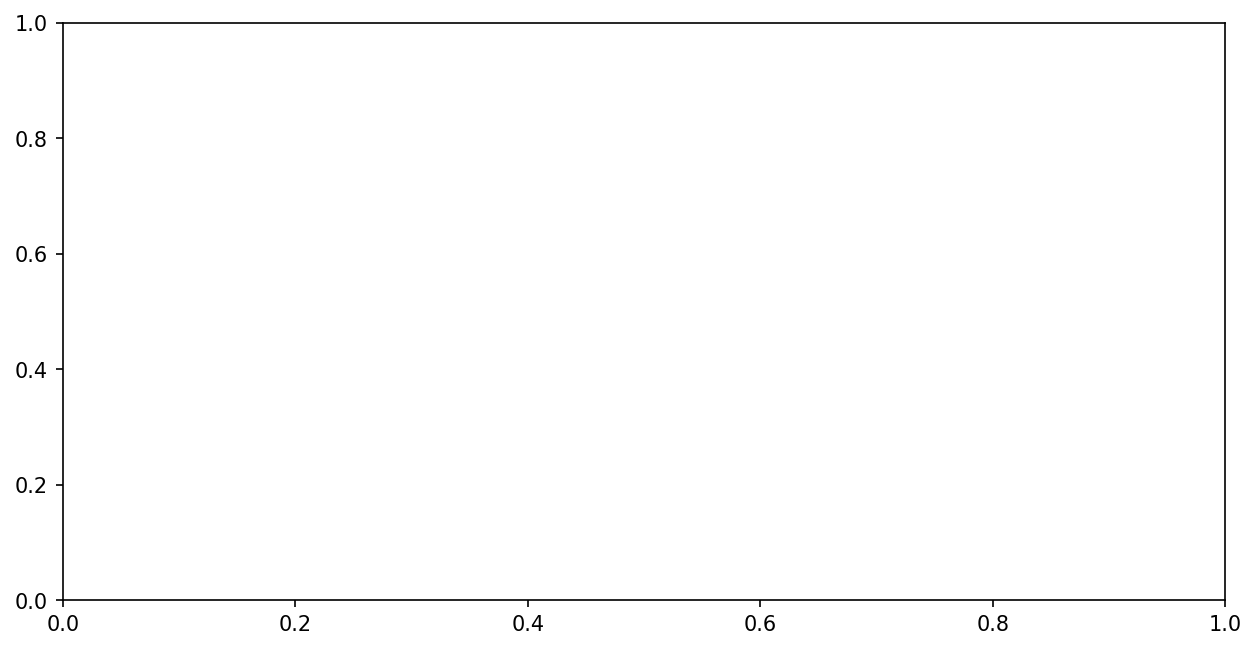

In [13]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][1] # freq of prompt
   pmt = data[v][3] # Qtot of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='.',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)

axs.set_xticks(np.arange(1.750,1.780,0.005))
axs.set_xticks(np.arange(1.750,1.780,0.001),minor=True)
# axs.set_xticks(np.arange(100,111,1))
# axs.set_xticks(np.arange(100,110,0.1),minor=True)
axs.set_yticks(np.arange(1.3e6,2.3e6,0.1e6))
axs.set_yticks(np.arange(1.3e6,2.3e6,0.02e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_tot')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_tot v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_rod v. Frequency (Radial Tilt in mm)')

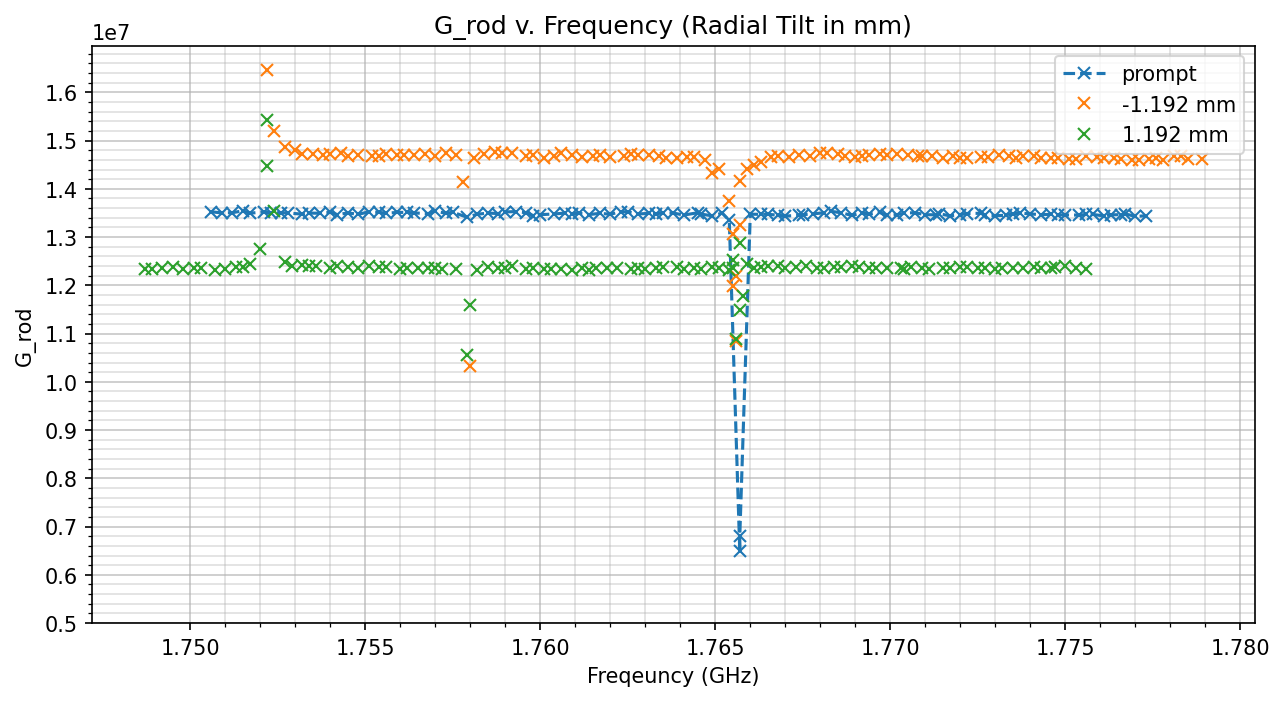

: 

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][1] # freq of prompt
   pmt = data[v][4] # Qrod of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)

axs.set_xticks(np.arange(1.750,1.780,0.005))
axs.set_xticks(np.arange(1.750,1.780,0.001),minor=True)

axs.set_yticks(np.arange(0.5e7,1.7e7,0.1e7))
axs.set_yticks(np.arange(0.5e7,1.7e7,0.2e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_rod')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_rod v. Frequency (Radial Tilt in mm)')